In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline

# Weather data

In [2]:
weather = pd.read_csv('data/environment/ninja_weather_55.6838_12.5354_uncorrected.csv',header=3)

In [3]:
time = pd.to_datetime(weather['time'], infer_datetime_format=True)
weather['time']=time
weather.index = weather.time

In [14]:
weather

,time,local_time,temperature,radiation_surface
time,,,,
2014-01-01 00:00,2014-01-01 00:00,2014-01-01 01:00,2.118,0.0
2014-01-01 01:00,2014-01-01 01:00,2014-01-01 02:00,2.147,0.0
2014-01-01 02:00,2014-01-01 02:00,2014-01-01 03:00,2.324,0.0
2014-01-01 03:00,2014-01-01 03:00,2014-01-01 04:00,2.344,0.0
2014-01-01 04:00,2014-01-01 04:00,2014-01-01 05:00,2.384,0.0
...,...,...,...,...
2014-12-31 19:00,2014-12-31 19:00,2014-12-31 20:00,3.075,0.0
2014-12-31 20:00,2014-12-31 20:00,2014-12-31 21:00,3.164,0.0
2014-12-31 21:00,2014-12-31 21:00,2014-12-31 22:00,3.210,0.0


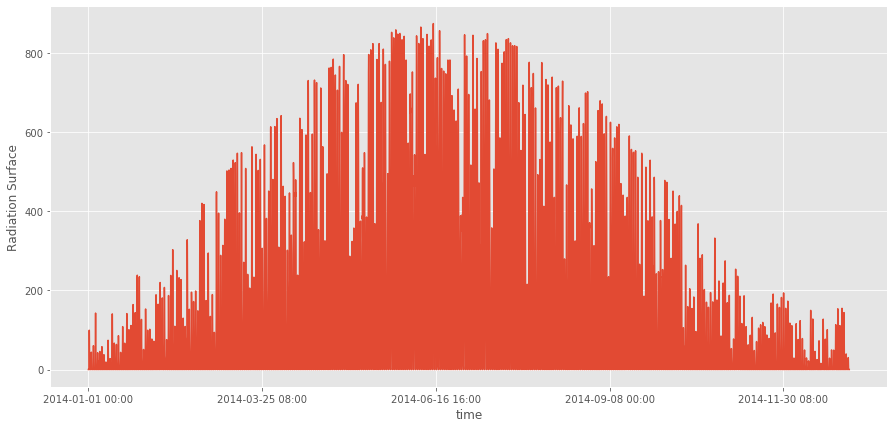

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Radiation Surface')
plt.xlabel('Date')
weather.loc[:,'radiation_surface'].plot(ax=ax)

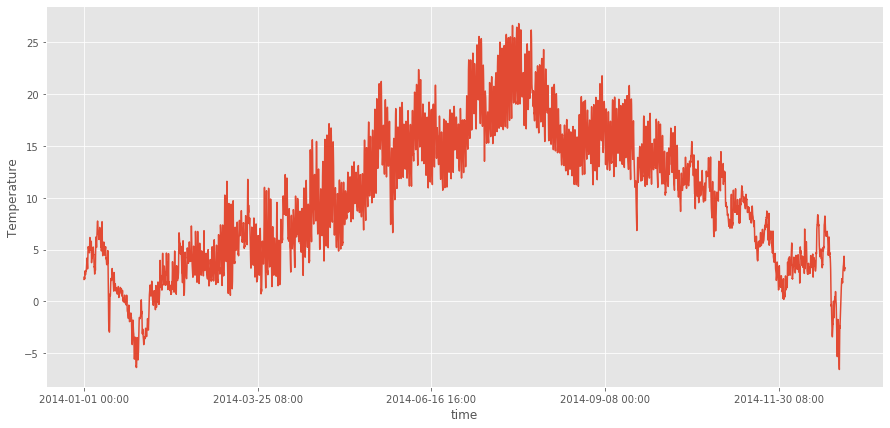

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
weather.loc[:,'temperature'].plot(ax=ax)

In [26]:
weather.describe()

,temperature,radiation_surface
count,8760.000000,8760.000000
mean,9.996626,133.634475
std,6.662291,211.872905
min,-6.557000,0.000000
25%,4.353250,0.000000
50%,10.026500,4.391500
75%,15.174500,190.447000
max,26.763000,875.069000


In [8]:
weather['month'] = weather['time'].dt.month
 

In [12]:
selected = weather.loc[(weather['month'] == 1) | (weather['month'] == 11) | (weather['month'] == 12),:]
months = {
    1:'January',
    11: 'November',
    12: 'December'
}

def extract_months(x):
    return months[x]

selected['Month'] = selected['month'].map(lambda x: extract_months(x))

<ipython-input-12-ef5cd34764ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['Month'] = selected['month'].map(lambda x: extract_months(x))


In [13]:
selected

,time,local_time,temperature,radiation_surface,month,Month
time,,,,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 01:00,2.118,0.0,1,January
2014-01-01 01:00:00,2014-01-01 01:00:00,2014-01-01 02:00,2.147,0.0,1,January
2014-01-01 02:00:00,2014-01-01 02:00:00,2014-01-01 03:00,2.324,0.0,1,January
2014-01-01 03:00:00,2014-01-01 03:00:00,2014-01-01 04:00,2.344,0.0,1,January
2014-01-01 04:00:00,2014-01-01 04:00:00,2014-01-01 05:00,2.384,0.0,1,January
...,...,...,...,...,...,...
2014-12-31 19:00:00,2014-12-31 19:00:00,2014-12-31 20:00,3.075,0.0,12,December
2014-12-31 20:00:00,2014-12-31 20:00:00,2014-12-31 21:00,3.164,0.0,12,December
2014-12-31 21:00:00,2014-12-31 21:00:00,2014-12-31 22:00,3.210,0.0,12,December


In [ ]:
start = pd.to_datetime('2014-11-01', infer_datetime_format=True)
end = pd.to_datetime('2014-12-31', infer_datetime_format=True)
nov_dec = weather.loc[(weather['time'] < end) & (weather['time'] >= start),:]

In [ ]:
start = pd.to_datetime('2014-11-01', infer_datetime_format=True)
end = pd.to_datetime('2014-12-31', infer_datetime_format=True)
jan = weather.loc[(weather['time'] < end) & (weather['time'] >= start),:]

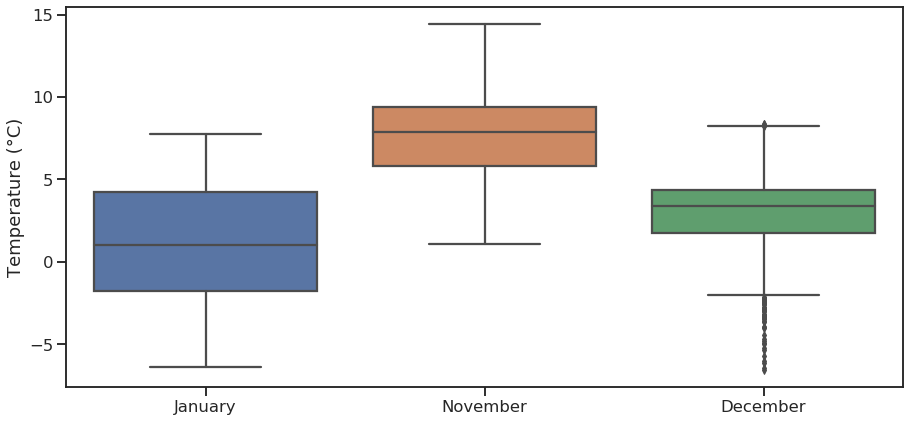

In [18]:
f, ax = plt.subplots(1,1,figsize=(15,7))

sns.boxplot(x=selected["Month"], y=selected["temperature"], ax=ax)

ax.set_xlabel('')
ax.set_ylabel('Temperature (°C)')
plt.savefig('data/output/Temp_Boxplot.png',bbox_inches='tight')

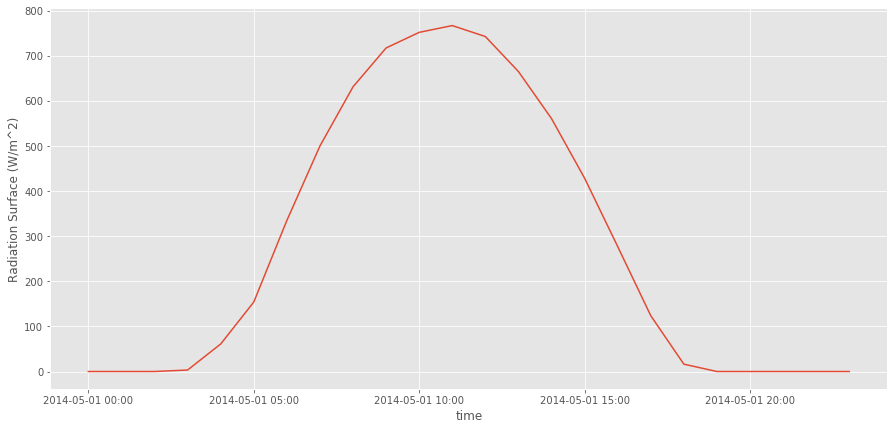

In [38]:

f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Radiation Surface (W/m^2)')
weather.loc[(weather['time'] < end) & (weather['time'] >= start),'radiation_surface'].plot(ax=ax)

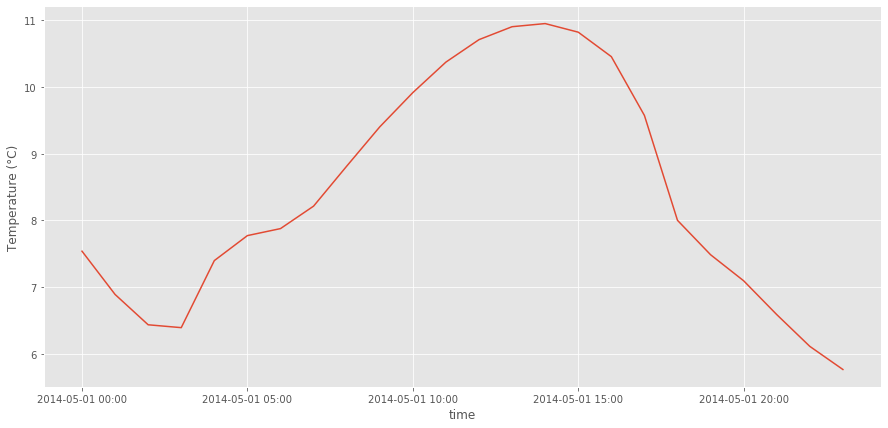

In [39]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature (°C)')
weather.loc[(weather['time'] < end) & (weather['time'] >= start),'temperature'].plot(ax=ax)

In [53]:
import random
random_day = random.randint(0,363)*24
weather.iloc[random_day:random_day+24,2][3]#.loc['temperature']

6.492000000000001

# Electricity prices

In [19]:
prices = pd.read_excel('data/environment/2014_spot_prices.xlsx')

In [20]:
prices['hour']=prices['Hours'].map(lambda x: x.split('-')[0].strip())

In [17]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT,string_date,hour
0,2014-01-01 00:00:00,00 - 01,"28,53","28,67","28,67","28,67","28,67","28,67","15,15","15,15",...,"29,07","29,07","28,67","28,67","28,67","28,67","32,06","32,06",01/01/2014,00
1,2014-01-01 00:00:00,01 - 02,"28,01","28,08","28,08","28,08","28,08","28,08","12,96","12,96",...,"28,81","28,81","28,08","28,08","28,08","28,08","32,02","32,02",01/01/2014,01
2,2014-01-01 00:00:00,02 - 03,"27,16","27,38","27,38","27,38","27,38","27,38","12,09","12,09",...,"28,42","28,42","27,38","27,38","27,38","27,38","27,38","27,38",01/01/2014,02
3,2014-01-01 00:00:00,03 - 04,"26,05","26,21","26,21","26,21","26,21","26,21","11,70","11,70",...,"27,63","27,63","26,21","26,21","26,21","26,21","26,21","26,21",01/01/2014,03
4,2014-01-01 00:00:00,04 - 05,"25,16","25,98","25,98","25,98","25,98","25,98","11,66","11,66",...,"25,98","25,98","25,98","25,98","25,98","25,98","25,98","25,98",01/01/2014,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,"29,54","29,49","29,49","29,49","29,49","30,93","29,49","29,49",...,"29,49","29,49","29,49","29,49","29,49","30,93","46,05","46,05",31-12-2014,19
8757,31-12-2014,20 - 21,"29,10","29,09","29,09","29,09","29,09","29,09","29,09","29,09",...,"29,09","29,09","29,09","29,09","29,09","29,09","45,78","45,78",31-12-2014,20
8758,31-12-2014,21 - 22,"28,83","28,82","28,82","28,82","28,82","28,82","28,82","28,82",...,"28,82","28,82","28,82","28,82","28,82","28,82","45,58","45,58",31-12-2014,21
8759,31-12-2014,22 - 23,"28,61","28,61","28,61","28,61","28,61","28,61","28,61","28,61",...,"28,61","28,61","28,61","28,61","28,61","28,61","29,06","29,06",31-12-2014,22


In [21]:
def extract_date(x,column):
    if column == 1:
        try: 
            return x.split('/')[1]
        except: 
            return x.split('-')[1]
    else:
        try: 
            x.split('/')[1]
            return x.split('/')[0]
        except: 
            return x.split('-')[0]
prices['year']='2014'
prices['month']=prices['string_date'].map(lambda x: extract_date(x,1))
prices['day']=prices['string_date'].map(lambda x: extract_date(x,0))

In [19]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Tr.heim,Tromsø,EE,LV,LT,string_date,hour,year,month,day
0,2014-01-01 00:00:00,00 - 01,"28,53","28,67","28,67","28,67","28,67","28,67","15,15","15,15",...,"28,67","28,67","28,67","32,06","32,06",01/01/2014,00,2014,01,01
1,2014-01-01 00:00:00,01 - 02,"28,01","28,08","28,08","28,08","28,08","28,08","12,96","12,96",...,"28,08","28,08","28,08","32,02","32,02",01/01/2014,01,2014,01,01
2,2014-01-01 00:00:00,02 - 03,"27,16","27,38","27,38","27,38","27,38","27,38","12,09","12,09",...,"27,38","27,38","27,38","27,38","27,38",01/01/2014,02,2014,01,01
3,2014-01-01 00:00:00,03 - 04,"26,05","26,21","26,21","26,21","26,21","26,21","11,70","11,70",...,"26,21","26,21","26,21","26,21","26,21",01/01/2014,03,2014,01,01
4,2014-01-01 00:00:00,04 - 05,"25,16","25,98","25,98","25,98","25,98","25,98","11,66","11,66",...,"25,98","25,98","25,98","25,98","25,98",01/01/2014,04,2014,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,"29,54","29,49","29,49","29,49","29,49","30,93","29,49","29,49",...,"29,49","29,49","30,93","46,05","46,05",31-12-2014,19,2014,12,31
8757,31-12-2014,20 - 21,"29,10","29,09","29,09","29,09","29,09","29,09","29,09","29,09",...,"29,09","29,09","29,09","45,78","45,78",31-12-2014,20,2014,12,31
8758,31-12-2014,21 - 22,"28,83","28,82","28,82","28,82","28,82","28,82","28,82","28,82",...,"28,82","28,82","28,82","45,58","45,58",31-12-2014,21,2014,12,31
8759,31-12-2014,22 - 23,"28,61","28,61","28,61","28,61","28,61","28,61","28,61","28,61",...,"28,61","28,61","28,61","29,06","29,06",31-12-2014,22,2014,12,31


In [22]:
prices['date']=pd.to_datetime(prices[['year','month','day','hour']])

In [23]:
prices['DK2']=prices['DK2'].map(lambda x: float(x.replace(',','.')) if type(x)==str else x)

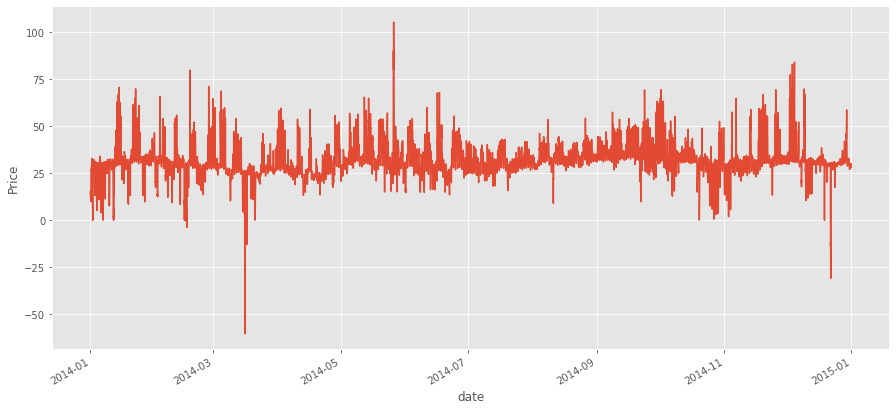

In [10]:
prices.index = prices.date
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Price')
prices.loc[:,'DK2'].plot(ax=ax)

In [11]:
jan_first = prices.loc[prices['date'] < pd.to_datetime('2014-01-02',infer_datetime_format=True)]

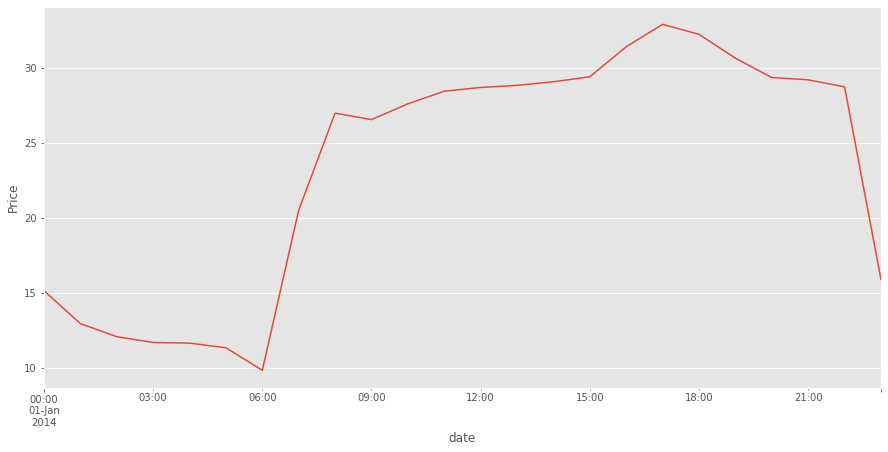

In [12]:
jan_first.index = jan_first.date
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Price')
jan_first.loc[:,'DK2'].plot(ax=ax)

In [13]:
prices.describe()

,DK2
count,8760.000000
mean,32.151904
std,9.336804
min,-60.260000
25%,28.010000
50%,31.300000
75%,35.282500
max,105.390000


In [24]:
prices['DK2'].to_csv('2014_DK2_spot_prices.csv')

In [28]:
start = pd.to_datetime('2014-11-01', infer_datetime_format=True)
end = pd.to_datetime('2014-12-31', infer_datetime_format=True)
nov_dec = prices.loc[(prices['date'] < end) & (prices['date'] >= start),:]

In [29]:
start = pd.to_datetime('2014-11-01', infer_datetime_format=True)
end = pd.to_datetime('2014-12-31', infer_datetime_format=True)
jan = prices.loc[(prices['date'] < end) & (prices['date'] >= start),:]

In [38]:
selected = prices.loc[(prices['month'] == '01') | (prices['month'] == '11') | (prices['month'] == '12'),:]
months = {
    '01':'January',
    '11': 'November',
    '12': 'December'
}

def extract_months(x):
    return months[x]

selected['Month'] = selected['month'].map(lambda x: extract_months(x))

<ipython-input-38-354976a7c3e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['Month'] = selected['month'].map(lambda x: extract_months(x))


In [35]:
prices

,Date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Tromsø,EE,LV,LT,string_date,hour,year,month,day,date
0,2014-01-01 00:00:00,00 - 01,"28,53","28,67","28,67","28,67","28,67","28,67","15,15",15.15,...,"28,67","28,67","32,06","32,06",01/01/2014,00,2014,01,01,2014-01-01 00:00:00
1,2014-01-01 00:00:00,01 - 02,"28,01","28,08","28,08","28,08","28,08","28,08","12,96",12.96,...,"28,08","28,08","32,02","32,02",01/01/2014,01,2014,01,01,2014-01-01 01:00:00
2,2014-01-01 00:00:00,02 - 03,"27,16","27,38","27,38","27,38","27,38","27,38","12,09",12.09,...,"27,38","27,38","27,38","27,38",01/01/2014,02,2014,01,01,2014-01-01 02:00:00
3,2014-01-01 00:00:00,03 - 04,"26,05","26,21","26,21","26,21","26,21","26,21","11,70",11.70,...,"26,21","26,21","26,21","26,21",01/01/2014,03,2014,01,01,2014-01-01 03:00:00
4,2014-01-01 00:00:00,04 - 05,"25,16","25,98","25,98","25,98","25,98","25,98","11,66",11.66,...,"25,98","25,98","25,98","25,98",01/01/2014,04,2014,01,01,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2014,19 - 20,"29,54","29,49","29,49","29,49","29,49","30,93","29,49",29.49,...,"29,49","30,93","46,05","46,05",31-12-2014,19,2014,12,31,2014-12-31 19:00:00
8757,31-12-2014,20 - 21,"29,10","29,09","29,09","29,09","29,09","29,09","29,09",29.09,...,"29,09","29,09","45,78","45,78",31-12-2014,20,2014,12,31,2014-12-31 20:00:00
8758,31-12-2014,21 - 22,"28,83","28,82","28,82","28,82","28,82","28,82","28,82",28.82,...,"28,82","28,82","45,58","45,58",31-12-2014,21,2014,12,31,2014-12-31 21:00:00
8759,31-12-2014,22 - 23,"28,61","28,61","28,61","28,61","28,61","28,61","28,61",28.61,...,"28,61","28,61","29,06","29,06",31-12-2014,22,2014,12,31,2014-12-31 22:00:00


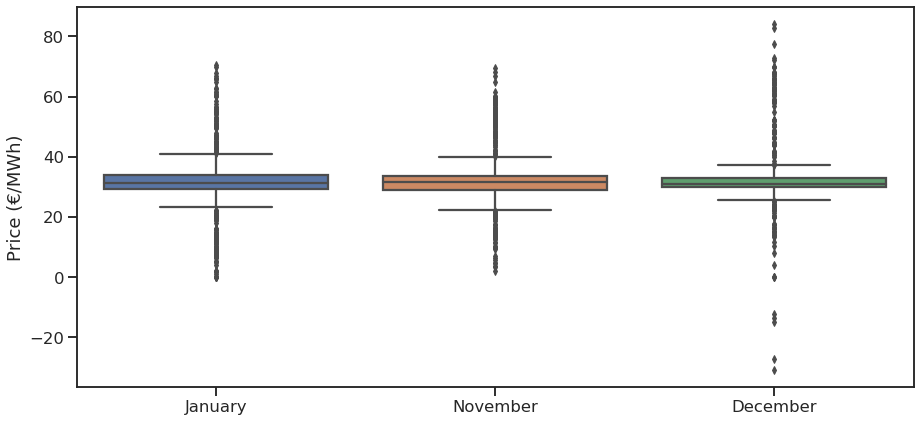

In [39]:
f, ax = plt.subplots(1,1,figsize=(15,7))

sns.boxplot(x=selected["Month"], y=selected["DK2"], ax=ax)

ax.set_xlabel('')
ax.set_ylabel('Price (€/MWh)')
plt.savefig('data/output/Price_Boxplot.png',bbox_inches='tight')